In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [5]:
# Paso 1: Obtener datos desde la API
response = requests.get(url = "https://www.datos.gov.co/resource/hxd2-uqjm.json")

print(response)
datos = json.loads(response.text)

<Response [200]>


In [6]:
# Paso 2: Convertir los datos a un DataFrame de Pandas
df = pd.DataFrame(datos)
df.columns

Index(['_', 'per_odo', 'instituci_n_universitaria', 'c_digo_programa',
       'programa', 'semestre', 'g_nero', 'estrato', 'ciudad_procedencia',
       'departamento_procedencia'],
      dtype='object')

In [9]:
# Inspeccionamos las primeras filas y la estructura de los datos (HEAD)
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   _   per_odo     instituci_n_universitaria c_digo_programa  \
0  1  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
1  2  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
2  3  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
3  4  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   
4  5  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           90555   

                     programa semestre g_nero estrato ciudad_procedencia  \
0  ADMINISTRACION DE EMPRESAS        4      F       2               CALI   
1  ADMINISTRACION DE EMPRESAS        7      M       2               CALI   
2  ADMINISTRACION DE EMPRESAS        1      F       2              VIJES   
3  ADMINISTRACION DE EMPRESAS        6      M       2               CALI   
4  ADMINISTRACION DE EMPRESAS        6      M       2              MOCOA   

  departamento_procedencia  
0          VALLE DEL CAUCA  
1          VALLE DEL CAUCA  
2          VALLE DEL CAUCA  
3          V

In [10]:
# Inspeccionamos las primeras filas y la estructura de los datos (INFO)
print("\nInformación sobre el DataFrame:")
print(df.info())


Información sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _                          1000 non-null   object
 1   per_odo                    1000 non-null   object
 2   instituci_n_universitaria  1000 non-null   object
 3   c_digo_programa            1000 non-null   object
 4   programa                   1000 non-null   object
 5   semestre                   1000 non-null   object
 6   g_nero                     1000 non-null   object
 7   estrato                    992 non-null    object
 8   ciudad_procedencia         992 non-null    object
 9   departamento_procedencia   992 non-null    object
dtypes: object(10)
memory usage: 78.3+ KB
None


In [11]:
# Inspeccionamos las primeras filas y la estructura de los datos (DESCRIBE)
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
           _   per_odo     instituci_n_universitaria c_digo_programa programa  \
count   1000      1000                          1000            1000     1000   
unique  1000         1                             1               2        2   
top     1000  2023 - 1  ESCUELA NACIONAL DEL DEPORTE           53212  DEPORTE   
freq       1      1000                          1000             578      578   

       semestre g_nero estrato ciudad_procedencia departamento_procedencia  
count      1000   1000     992                992                      992  
unique        9      2       6                113                       27  
top           3      M       2               CALI          VALLE DEL CAUCA  
freq        145    697     414                651                      795  


In [12]:
# Paso 3: Preprocesamiento de los Datos

# Comprobamos si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
_                            0
per_odo                      0
instituci_n_universitaria    0
c_digo_programa              0
programa                     0
semestre                     0
g_nero                       0
estrato                      8
ciudad_procedencia           8
departamento_procedencia     8
dtype: int64


In [13]:
# Paso 4: Limpieza de los datos
# Elimina filas con valores nulos en las columnas relevantes (si es necesario)
df = df.dropna(subset=['estrato' , 'ciudad_procedencia', 'departamento_procedencia'])
df

,_,per_odo,instituci_n_universitaria,c_digo_programa,programa,semestre,g_nero,estrato,ciudad_procedencia,departamento_procedencia
0,1,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,90555,ADMINISTRACION DE EMPRESAS,4,F,2,CALI,VALLE DEL CAUCA
1,2,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,90555,ADMINISTRACION DE EMPRESAS,7,M,2,CALI,VALLE DEL CAUCA
2,3,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,90555,ADMINISTRACION DE EMPRESAS,1,F,2,VIJES,VALLE DEL CAUCA
3,4,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,90555,ADMINISTRACION DE EMPRESAS,6,M,2,CALI,VALLE DEL CAUCA
4,5,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,90555,ADMINISTRACION DE EMPRESAS,6,M,2,MOCOA,PUTUMAYO
...,...,...,...,...,...,...,...,...,...,...
995,996,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,7,M,3,CALI,VALLE DEL CAUCA
996,997,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,M,1,BARBACOAS,NARIÑO
997,998,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,2,M,3,CALI,VALLE DEL CAUCA
998,999,2023 - 1,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,3,M,3,CALI,VALLE DEL CAUCA


In [ ]:
# Confirmación eliminación datos nulos

# Comprobamos si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
_                            0
per_odo                      0
instituci_n_universitaria    0
c_digo_programa              0
programa                     0
semestre                     0
g_nero                       0
estrato                      0
ciudad_procedencia           0
departamento_procedencia     0
dtype: int64


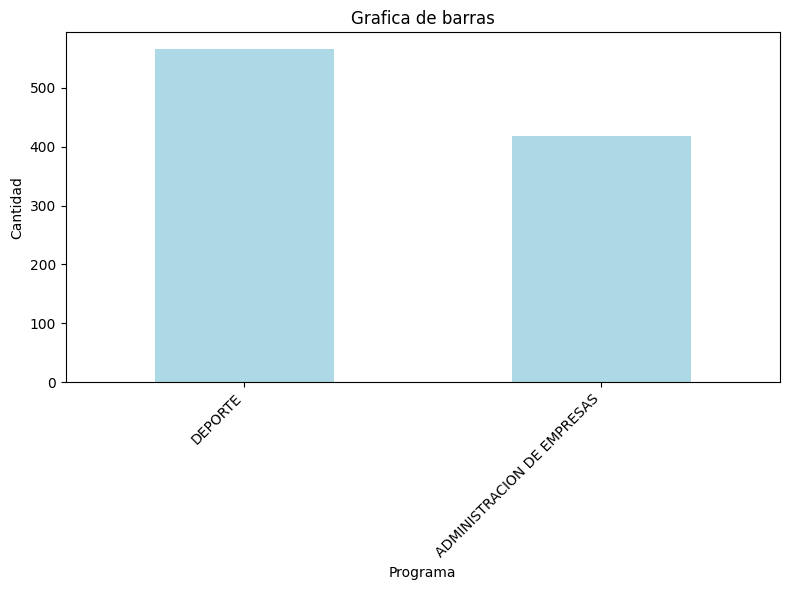

In [15]:
# Paso 5: Visualización de los Datos

# Gráfico de barras para visualizar la columna programa

plt.figure(figsize=(8, 6))
df['programa'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Grafica de barras')
plt.xlabel('Programa')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

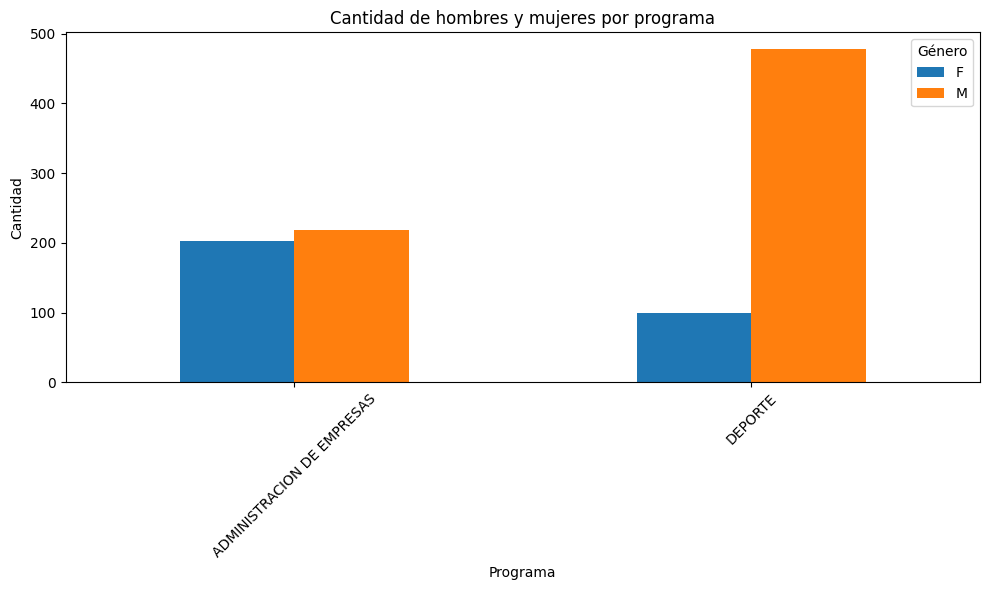

In [8]:
# Agrupar y contar hombres y mujeres por programa
conteo = df.groupby(['programa', 'g_nero']).size().reset_index(name='cantidad')

# Transformar los datos para graficar
conteo_pivot = conteo.pivot(index='programa', columns='g_nero', values='cantidad').fillna(0)

# Crear la gráfica
conteo_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Cantidad de hombres y mujeres por programa")
plt.xlabel("Programa")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.tight_layout()
plt.show()

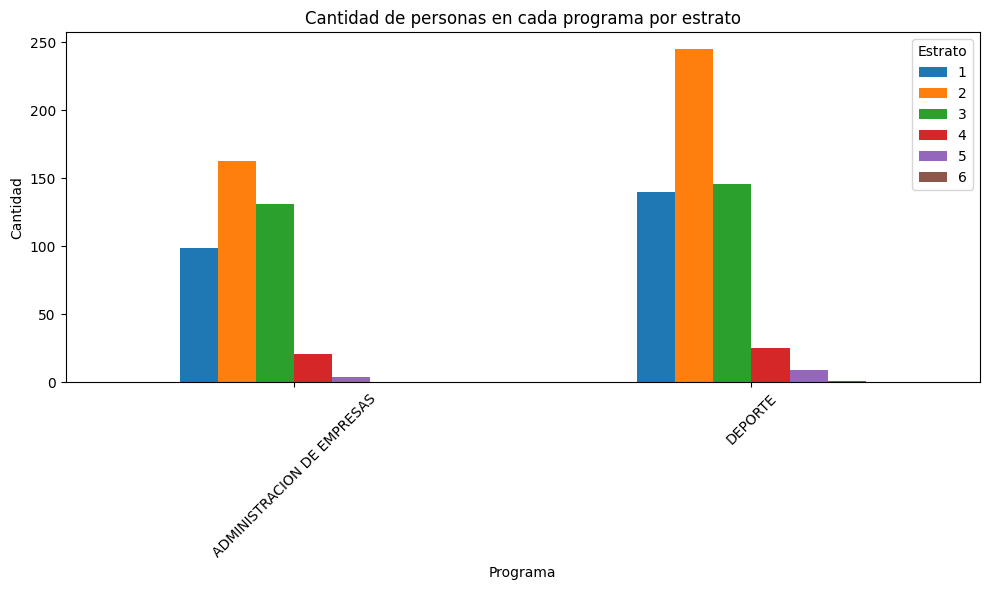

In [ ]:
# Agrupar y contar cantidad de personas en cada programa por estrato
conteo = df.groupby(['programa', 'estrato']).size().reset_index(name='cantidad')

# Transformar los datos para graficar
conteo_pivot = conteo.pivot(index='programa', columns='estrato', values='cantidad').fillna(0)

# Crear la gráfica
conteo_pivot.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title("Cantidad de personas en cada programa por estrato")
plt.xlabel("Programa")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Estrato")
plt.tight_layout()
plt.show()